# Imports 

In [1]:
import ipynb.fs.full.PrepareData as data
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
  7%|▋         | 3/43 [00:00<00:01, 27.83it/s]

[178, 37, 3062, 2854, 3127, 3466, 3663, 4011, 3906, 3768, 3411, 2748, 2674]
2 chs: 178 entries
3 chs: 37 entries
4 chs: 3062 entries
5 chs: 2854 entries
6 chs: 3127 entries
7 chs: 3466 entries
8 chs: 3663 entries
9 chs: 4011 entries
10 chs: 3906 entries
15 chs: 3768 entries
20 chs: 3411 entries
30 chs: 2748 entries
40 chs: 2674 entries


 88%|████████▊ | 38/43 [00:06<00:01,  4.93it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:01, 15.91it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:05<00:00,  5.27it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:05<00:00,  6.53it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:02, 14.05it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:04<00:00,  8.25it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:05<00:00,  5.22it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:02, 14.09it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 77%|███████▋  | 33/43 [00:04<00:02,  4.87it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:05<00:00,  7.21it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:05<00:00,  7.10it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:01, 18.43it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:05<00:00,  6.54it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:05<00:00,  7.73it/s]


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]

sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict.keys())

dict_keys(['LassoCV', 'ElasticNetCV', 'Ridge', 'GradientBoostingRegressor', 'RidgeCV'])


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [4]:
import matplotlib.pyplot as plt

def plotGrid(gainData, lossData):
    fig, axis = plt.subplots(2, figsize = (10, 10))
    #fig.suptitle("One regressor per variable - {} amplifiers".format(data.ampNumber), fontsize = 20)
    
    axis[0].boxplot(gainData)
    axis[0].set_title("Gain test error", fontsize = 18)
    axis[0].xaxis.set_tick_params(labelsize = 14)
    axis[0].set_ylim(0, 5)
    
    axis[1].boxplot(lossData)
    axis[1].set_title("Loss test error", fontsize = 18)
    axis[1].xaxis.set_tick_params(labelsize = 14)
    axis[1].set_xticklabels(strategyArray, rotation = -45, ha = 'left')
    axis[1].set_ylim(0, 5)

    fig.text(0.08, 0.5, 'Mean Absolute error (dB)', va='center', rotation='vertical', fontsize = 18)

    plt.gcf().subplots_adjust(bottom = 0.15)
    fig.savefig("../../graphs/perVar-{}amps.eps".format(data.ampNumber), format = 'eps', dpi = 1000, bbox_inches = "tight")

# Building the models

In [5]:
X, y = data.loadDataset()
X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.3, random_state = 0)

count = 1

In [6]:
from sklearn.linear_model import LassoCV

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2):
    model = MultiOutputRegressor(LassoCV())
    
    param_grid = {
        'estimator__max_iter': [250, 500, 1000],
        'estimator__cv': [5, 10],
        'estimator__selection': ['cyclic', 'random']
    }
    
    grid = GridSearchCV(model, param_grid=param_grid)
    grid.fit(X_train, y_train[:, i: i + 1])
    
    model = grid.best_estimator_
    model.fit(X_train, y_train[:, i: i + 1])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 1]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 1]))
        finalResult = data.np.hstack((finalResult, result))
    
print(finalY[0], finalResult[0])

strategyArray.append("{} - LassoCV".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.71885283  0.66767072 18.43048475  1.16648148 22.43829645  2.4434929
 21.92695416  1.51757722]


In [7]:
from sklearn.linear_model import ElasticNetCV

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2):
    model = MultiOutputRegressor(ElasticNetCV())
    
    param_grid = {
        'estimator__cv': [5, 10],
        'estimator__selection': ['cyclic', 'random'],
        'estimator__l1_ratio': [.1, .5, .7, .9, .95, .99, 1]
    }
    
    grid = GridSearchCV(model, param_grid=param_grid)
    grid.fit(X_train, y_train[:, i: i + 1])
    
    model = grid.best_estimator_
    model.fit(X_train, y_train[:, i: i + 1])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 1]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 1]))
        finalResult = data.np.hstack((finalResult, result))
    
print(finalY[0], finalResult[0])

strategyArray.append("{} - ElasticNetCV".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.81583445  0.67505565 18.43050671  1.21712304 22.43823966  2.54444942
 21.9395172   1.51420673]


In [8]:
from sklearn.linear_model import Ridge

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2):
    model = MultiOutputRegressor(Ridge())
    
    param_grid = {
        'estimator__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }
    
    grid = GridSearchCV(model, param_grid=param_grid)
    grid.fit(X_train, y_train[:, i: i + 1])
    
    model = grid.best_estimator_
    model.fit(X_train, y_train[:, i: i + 1])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 1]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 1]))
        finalResult = data.np.hstack((finalResult, result))
    
print(finalY[0], finalResult[0])

strategyArray.append("{} - Ridge".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.77631547  0.85763392 18.48099053  1.07209704 22.3574675   2.2738062
 21.9062342   1.51592181]


In [9]:
from sklearn.ensemble import GradientBoostingRegressor

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2):
    model = MultiOutputRegressor(GradientBoostingRegressor())
    
    param_grid = {
        'estimator__learning_rate': [0.1, 0.3, 0.5, 0.7],
        'estimator__n_estimators': [50, 100, 200],
        'estimator__min_samples_split': [1, 2, 5, 10]
    }
    
    grid = GridSearchCV(model, param_grid=param_grid)
    grid.fit(X_train, y_train[:, i: i + 1])
    
    model = grid.best_estimator_
    model.fit(X_train, y_train[:, i: i + 1])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 1]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 1]))
        finalResult = data.np.hstack((finalResult, result))
    
print(finalY[0], finalResult[0])

strategyArray.append("{} - GradientBoostingRegressor".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.70143786  0.67398898 18.37549906  1.06235282 22.34119073  2.20895227
 21.87509912  1.57743906]


In [10]:
from sklearn.linear_model import RidgeCV

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2):
    model = MultiOutputRegressor(RidgeCV())
    
    param_grid = {
        'estimator__cv': [5, 10],
        'estimator__fit_intercept': [True, False]
    }
    
    grid = GridSearchCV(model, param_grid=param_grid)
    grid.fit(X_train, y_train[:, i: i + 1])
    
    model = grid.best_estimator_
    model.fit(X_train, y_train[:, i: i + 1])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 1]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 1]))
        finalResult = data.np.hstack((finalResult, result))
    
print(finalY[0], finalResult[0])

strategyArray.append("{} - RidgeCV".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [18.77924665  0.59587045 18.48800411  1.1766695  22.26344811  2.12792808
 21.46375572  1.48493774]


In [11]:
from sklearn.dummy import DummyRegressor

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2):
    model = MultiOutputRegressor(DummyRegressor())
    model.fit(X_train, y_train[:, i: i + 1])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 1]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 1]))
        finalResult = data.np.hstack((finalResult, result))
    
print(finalY[0], finalResult[0])

strategyArray.append("{} - DummyRegressor".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[22.  2. 15.  0. 20.  6. 24.  1.] [21.44345238  4.13988095 21.91964286  1.60416667 22.89880952  1.78571429
 21.08630952  1.58928571]


dict_keys(['LassoCV', 'ElasticNetCV', 'Ridge', 'GradientBoostingRegressor', 'RidgeCV'])


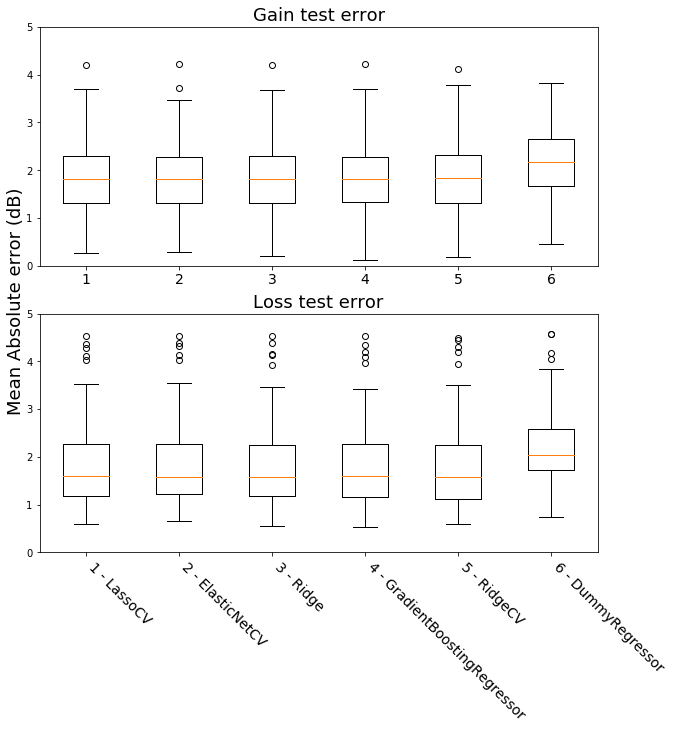

In [12]:
print(sortedDict.keys())
plotGrid(errorArray[0], errorArray[1])